To get access to CLIMADA historical data, we need to set up the environment first. In VSCode, we need to install the Python and Jupyter extensions in the first place. Afterwards, in the left sidebar, select the “Extensions” symbol, enter “Python” in the search bar and click Install next to the “Python” extension. Repeat this process for “Jupyter”.

Open a Jupyter Notebook or create a new one. On the top right, click on Select Kernel, select Python Environments… and then choose the Python interpreter from the climada_env. 

In [1]:
from climada.hazard import TCTracks

In [ ]:
# We want to get Indian Ocean's historical data, which is North Indian Ocean (NI) + South Indian Ocean (SI)

# We get the historical NI data first.

tc_hist_ni = TCTracks.from_ibtracs_netcdf(basin='NI')

IBTrACS.ALL.v04r01.nc: 23.1MB [00:04, 4.88MB/s]                            


2025-03-03 10:55:45,002 - climada.hazard.tc_tracks - WARNING - 1458 storm events are discarded because no valid wind/pressure values have been found: 1842298N11080, 1845336N10074, 1854303N14072, 1877135N10083, 1877192N21090, ...
2025-03-03 10:55:45,012 - climada.hazard.tc_tracks - WARNING - 1 storm events are discarded because only one valid timestep has been found: 1995269N21088.


In [6]:
# Then, we get the historical SI data.

tc_hist_si = TCTracks.from_ibtracs_netcdf(basin='SI')

2025-03-03 11:19:54,830 - climada.hazard.tc_tracks - WARNING - 1787 storm events are discarded because no valid wind/pressure values have been found: 1848011S09079, 1848011S09080, 1848011S15057, 1848011S16057, 1848061S12075, ...
2025-03-03 11:19:54,856 - climada.hazard.tc_tracks - WARNING - 23 storm events are discarded because only one valid timestep has been found: 1923068S11127, 1928086S15108, 1929009S15132, 1934087S20114, 1937065S09130, ...


The best-track historical data from the International Best Track Archive for Climate Stewardship (IBTrACS) can easily be loaded into CLIMADA to study the historical records of TC events. The constructor from_ibtracs_netcdf() generates the Datasets for tracks selected by IBTrACS id, or by basin and year range. To achieve this, it downloads the first time the IBTrACS data v4 in netcdf format and stores it in ~/climada/data/. The tracks can be accessed later either using the attribute data or using get_track(), which allows to select tracks by its name or id.

In [ ]:
tc_hist_ni.data

Number of tracks: 317


Text(0.5, 1.0, 'All historical tracks, NI')

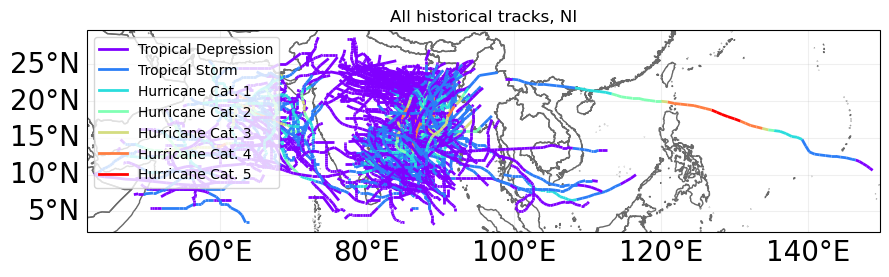

In [24]:
# years 1990 and 1999 in basin NI.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well

print('Number of tracks:', tc_hist_ni.size)
ax = tc_hist_ni.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('All historical tracks, NI') # set title